In [1]:
import sklearn.cluster as sc
import random
import pandas as pd
import numpy as np
import time

%matplotlib inline
import matplotlib.pyplot as plt

num_of_clusters = 2

In [2]:
file_name = 'list-of-airports-in-united-states-of-america-hxl-tags-1.csv'
file_name = 'usa_airports.csv'
data = pd.read_csv(file_name)
data.head()

,Unnamed: 0,City,Airport,Enplanements,Link,latitude,longitude
0,0,Atlanta,Hartsfield–Jackson Atlanta International Airport,50501858.0,/wiki/Hartsfield%E2%80%93Jackson_Atlanta_Inter...,33.63667,-84.42806
1,1,Los Angeles,Los Angeles International Airport,39636042.0,/wiki/Los_Angeles_International_Airport,33.94250,-118.40806
2,2,Chicago,Chicago O'Hare International Airport,37589899.0,/wiki/O%27Hare_International_Airport,41.97861,-87.90472
3,3,Dallas,Dallas/Fort Worth International Airport,31283579.0,/wiki/Dallas/Fort_Worth_International_Airport,32.89694,-97.03806
4,4,Denver,Denver International Airport,28267394.0,/wiki/Denver_International_Airport,39.86167,-104.67306


In [3]:

X = data[['Airport','Enplanements','latitude','longitude']]

X = X.loc[X.longitude <0]
X.index = np.array([i for i in range(len(X.index-1))])

X = X.loc[X.latitude >20]
X.index = np.array([i for i in range(len(X.index-1))])

X = X.drop(np.where((X.longitude<-130) & (X.latitude<40))[0])#отсекаем аляску
X.index = np.array([i for i in range(len(X.index-1))])

X = X.drop(np.where((X.longitude<-130) & (X.latitude>40))[0])#отсекаем гавайи
X.index = np.array([i for i in range(len(X.index-1))])

a=np.array([X.longitude, X.latitude])
len(a)

2

In [4]:
X

,Airport,Enplanements,latitude,longitude
0,Hartsfield–Jackson Atlanta International Airport,50501858.0,33.63667,-84.42806
1,Los Angeles International Airport,39636042.0,33.94250,-118.40806
2,Chicago O'Hare International Airport,37589899.0,41.97861,-87.90472
3,Dallas/Fort Worth International Airport,31283579.0,32.89694,-97.03806
4,Denver International Airport,28267394.0,39.86167,-104.67306
...,...,...,...,...
206,Republic Airport,10910.0,40.72889,-73.41333
207,Lebanon Municipal Airport,10245.0,43.62611,-72.30417
208,Alpena County Regional Airport,10031.0,45.07806,-83.56028
209,Sidney–Richland Municipal Airport,8065.0,47.70694,-104.19250


In [5]:
X["empl_share"] = X.Enplanements/X.Enplanements.sum()
X

,Airport,Enplanements,latitude,longitude,empl_share
0,Hartsfield–Jackson Atlanta International Airport,50501858.0,33.63667,-84.42806,0.075565
1,Los Angeles International Airport,39636042.0,33.94250,-118.40806,0.059307
2,Chicago O'Hare International Airport,37589899.0,41.97861,-87.90472,0.056245
3,Dallas/Fort Worth International Airport,31283579.0,32.89694,-97.03806,0.046809
4,Denver International Airport,28267394.0,39.86167,-104.67306,0.042296
...,...,...,...,...,...
206,Republic Airport,10910.0,40.72889,-73.41333,0.000016
207,Lebanon Municipal Airport,10245.0,43.62611,-72.30417,0.000015
208,Alpena County Regional Airport,10031.0,45.07806,-83.56028,0.000015
209,Sidney–Richland Municipal Airport,8065.0,47.70694,-104.19250,0.000012


# data_X = data[(data.type == 'large_airport')|(data.type =='medium_airport')]
data_X = data[(data.type == 'large_airport')]
# data_X = data[(data.type == 'medium_airport')]
X = data_X[['type','name','latitude_deg','longitude_deg']]
X = X.drop_duplicates(subset=['latitude_deg', 'longitude_deg'], keep='first')
X['longitude_deg'] = X['longitude_deg'].astype(float)
X['latitude_deg'] = X['latitude_deg'].astype(float)

X = X.loc[X.longitude_deg <0]
X.index = np.array([i for i in range(len(X.index-1))])

X = X.loc[np.where(X.name.str.find('Force Base')==-1)[0]]# отсекаем базы ввс
X.index = np.array([i for i in range(len(X.index-1))])

X = X.drop(np.where((X.longitude_deg<-130) & (X.latitude_deg<40))[0])#отсекаем аляску
X.index = np.array([i for i in range(len(X.index-1))])

X = X.drop(np.where((X.longitude_deg<-130) & (X.latitude_deg>40))[0])#отсекаем гавайи
X.index = np.array([i for i in range(len(X.index-1))])

X

a=np.array([X.longitude_deg, X.latitude_deg])

In [6]:
X.dtypes

Airport          object
Enplanements    float64
latitude        float64
longitude       float64
empl_share      float64
dtype: object

In [7]:
# arr = np.array([[random.random()**2,random.random()**3] for i in range(500)])
arr = np.array([[a[0][i],a[1][i]] for i in range(len(a[0]))])
# arr

In [8]:
arr_X = [[i[0] for i in arr],[i[1] for i in arr]]

In [9]:
kmeans = sc.KMeans(init='k-means++',n_clusters=num_of_clusters , random_state=0).fit(arr)

In [10]:
cc_X = [[i[0] for i in kmeans.cluster_centers_],[i[1] for i in kmeans.cluster_centers_]]

In [11]:
params = {
    0:'#5f7c9f',
    1:'#bb0000',
    2:'#b0ba00',
    3:'#b07c9f'
}

# def par_f(i):
#     r = str((i*6)%256)
#     if len(r)<2: r='e'+r
#     g = str((100-i*6)%256)
#     if len(g)<2: g='d'+g
#     b =  str((100-(i**2)*6)%256)
#     if len(b)<2: b='f'+b
#     return '#'+r+g+b
def par_f(i):
    r = (i*100)%256
    g = (255-i*12)%256
    b =  (255-(i**2)*6)%256
    m = 256/max(r,g,b)
    r=int(r*m)%256
    g=int(g*m)%256
    b=int(b*m)%256
    return '#%02x%02x%02x' % (r, g, b)

In [12]:
kl=[]

kl += [kmeans.labels_]
X["klaster"] = kl[0]
X.head()

,Airport,Enplanements,latitude,longitude,empl_share,klaster
0,Hartsfield–Jackson Atlanta International Airport,50501858.0,33.63667,-84.42806,0.075565,0
1,Los Angeles International Airport,39636042.0,33.94250,-118.40806,0.059307,1
2,Chicago O'Hare International Airport,37589899.0,41.97861,-87.90472,0.056245,0
3,Dallas/Fort Worth International Airport,31283579.0,32.89694,-97.03806,0.046809,0
4,Denver International Airport,28267394.0,39.86167,-104.67306,0.042296,1


In [13]:
while X.loc[X.klaster==0].Enplanements.sum()>X.loc[X.klaster==1].Enplanements.sum():
    i_min = X.loc[X.klaster==0].longitude.argmin()
    index_min = X.loc[X.klaster==0].iloc[i_min].name
    X.klaster[index_min] = 1
#     print(index_min)
#     print(X.iloc[index_min])
    
X

<ipython-input-13-2a83f605855c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.klaster[index_min] = 1


,Airport,Enplanements,latitude,longitude,empl_share,klaster
0,Hartsfield–Jackson Atlanta International Airport,50501858.0,33.63667,-84.42806,0.075565,0
1,Los Angeles International Airport,39636042.0,33.94250,-118.40806,0.059307,1
2,Chicago O'Hare International Airport,37589899.0,41.97861,-87.90472,0.056245,1
3,Dallas/Fort Worth International Airport,31283579.0,32.89694,-97.03806,0.046809,1
4,Denver International Airport,28267394.0,39.86167,-104.67306,0.042296,1
...,...,...,...,...,...,...
206,Republic Airport,10910.0,40.72889,-73.41333,0.000016,0
207,Lebanon Municipal Airport,10245.0,43.62611,-72.30417,0.000015,0
208,Alpena County Regional Airport,10031.0,45.07806,-83.56028,0.000015,0
209,Sidney–Richland Municipal Airport,8065.0,47.70694,-104.19250,0.000012,1


In [14]:
X.loc[X.klaster==0].Enplanements.sum()

327403456.0

In [15]:
# pd.set_option('display.max_rows', None)
X

,Airport,Enplanements,latitude,longitude,empl_share,klaster
0,Hartsfield–Jackson Atlanta International Airport,50501858.0,33.63667,-84.42806,0.075565,0
1,Los Angeles International Airport,39636042.0,33.94250,-118.40806,0.059307,1
2,Chicago O'Hare International Airport,37589899.0,41.97861,-87.90472,0.056245,1
3,Dallas/Fort Worth International Airport,31283579.0,32.89694,-97.03806,0.046809,1
4,Denver International Airport,28267394.0,39.86167,-104.67306,0.042296,1
...,...,...,...,...,...,...
206,Republic Airport,10910.0,40.72889,-73.41333,0.000016,0
207,Lebanon Municipal Airport,10245.0,43.62611,-72.30417,0.000015,0
208,Alpena County Regional Airport,10031.0,45.07806,-83.56028,0.000015,0
209,Sidney–Richland Municipal Airport,8065.0,47.70694,-104.19250,0.000012,1


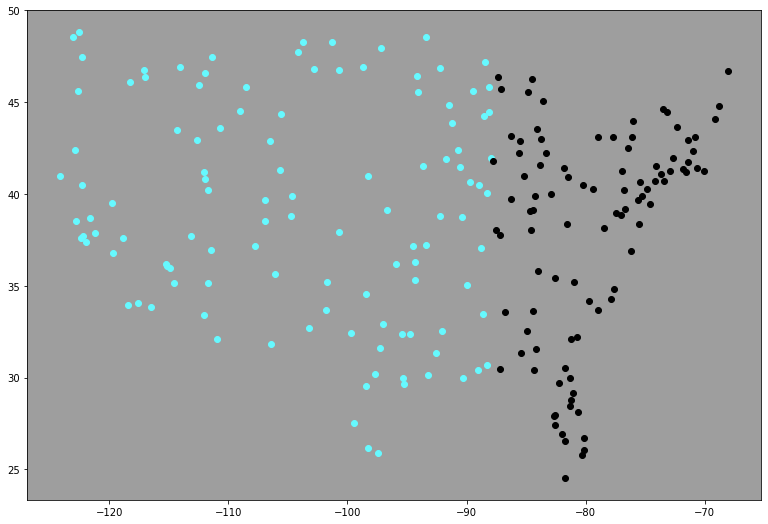

In [16]:
# plt.plot(arr_X[0],arr_X[1], 'fo')
# plt.plot(cc_X[0],cc_X[1], 'bo')

fig=plt.figure()
ax=fig.add_axes([0,0,1.7,1.7])
ax.set_facecolor('#'+'9e'*3)

# plt.text(0, 0, 'iter '+ str(X.shape()))

# ax.scatter(arr_X[0],arr_X[1], color='#bb0000')
for i in range(len(arr)):
#     ax.scatter(arr_X[0][i],arr_X[1][i], color=params[kmeans.labels_[i]])
    ax.scatter(arr_X[0][i],arr_X[1][i], color=par_f(X.klaster[i]))
# ax.scatter(cc_X[0],cc_X[1], color='#ff0000',marker = '^')

plt.show()

In [17]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-np.pi, np.pi, 50)
y = x
z = np.cos(x)*np.cos(y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='parametric curve')

In [18]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [19]:
p = np.array(X.Enplanements)
p.sum()

668324708.0

In [20]:
p.sum()/len(p)

3167415.6777251186

# Main function

In [21]:
from  geopy.distance  import  geodesic

def foo(x,arr, p):
    p_sum = p.sum()
    r = 0
    for i in range(len(arr)):
        res = geodesic ( [x[0]-arr[i][0],x[1]-arr[i][1]] ,[0,0] ).kilometers / 3167.677
        res =p[i]/p_sum * 2.71**res
        r+=res
#     res = geodesic ( [x[0]-y[0],x[1]-y[1]] ,[0,0] ).kilometers
    return r

foo(arr[1],arr,p)

2.7990419733580536

In [22]:
num_of_points = 25

ax = [i for i in range(-120,-70,2)]
ay = [i for i in range(25,50)]

ax = np.linspace(-120,-70,num_of_points)
ay = np.linspace(25,50,num_of_points)
x, y = np.meshgrid(ax, ay)
len(x[0])

25

In [23]:
np.linspace(1,2,10)

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

In [24]:
z = [[0 for i in range(len(x[0]))]for i in range(len(x))]

for i in range(len(x)):
    for j in range(len(x[0])):
        z[i][j] = foo([x[i][j],y[i][j]],arr,p)
z

[[3.16640393869448,
  2.9857946230410617,
  2.8231027309235452,
  2.6775261235959515,
  2.548219543404677,
  2.4343400064903107,
  2.335092978708453,
  2.2498021275453444,
  2.1779828772825773,
  2.119408979183126,
  2.0741799579848306,
  2.042722802955996,
  2.0254739659752947,
  2.0225043943693746,
  2.0336033155216944,
  2.0587087786138327,
  2.098104400954128,
  2.152461632267108,
  2.2231335202238025,
  2.3129038743915897,
  2.42621935689123,
  2.5578580061767866,
  2.7057800416978193,
  2.8699507351646663,
  3.0507012201705512],
 [3.128160933579523,
  2.9472355067594838,
  2.7843944017759643,
  2.6388055375688344,
  2.5095730741983875,
  2.395794679370975,
  2.2966013999846893,
  2.2112461222685402,
  2.1391915757525344,
  2.080182537375626,
  2.034353587684613,
  2.002312586924755,
  1.9847057726637682,
  1.9815996292664508,
  1.9925342287474983,
  2.0173417972053365,
  2.0563041180981965,
  2.110065861001753,
  2.180016906907686,
  2.269241736711386,
  2.38474013106388,
  2.517

In [25]:
len(z)
len(x)

25

In [26]:
z = np.array(z)

In [27]:
z.min()

1.794207217761752

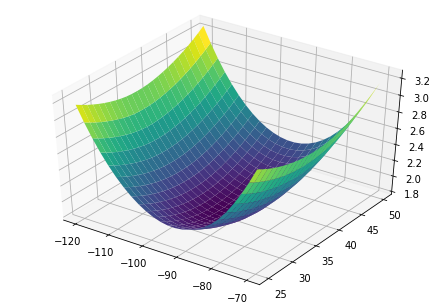

In [28]:
fig = pylab.figure()
axes = Axes3D(fig)

# axes.set_xlim3d(-100, -80)
# axes.set_ylim3d(25, 50)
# axes.set_zlim3d(950, 970)

axes.view_init(40,-55)

axes.plot_surface(x, y, z,cmap='viridis')

# axes.w_zaxis.set_pane_color((0,0,0,1))

pylab.show()

# Plot of main function is built

In [29]:
import copy

In [30]:
def grad(point):
    ed = 0.001
    p1 = foo(point,arr,p)
    p2x = foo([point[0]+ed, point[1]],arr,p)
    p2y = foo([point[0], point[1]+ed],arr,p)
    return [-p1+p2x, -p1 + p2y]

grad([-110,27])

[-5.2376955682387205e-05, -3.251608724452737e-05]

# Coordinate descent method

In [48]:
start_point = [-110., 45.]
points = [start_point]
point = copy.copy(start_point)

step = 2
iter = 0;
iter_sub = 0
while step>0.001:
    gr = grad(point)
    i=0
    mod = 0
    vec = [0,0]
    
    if gr[0]**2>gr[1]**2:
        i=0
        if gr[0]<0:
            mod = 1
        else:
            mod = -1
    else:
        i=1
        if gr[1]<0:
            mod = 1
        else:
            mod = -1
    
    
    vec[i] = mod
    st_gr = gr
    while st_gr[i]*gr[i]>0:
        point[i]+=vec[i]*step
        gr = grad(point)
        
        print(f"{iter_sub}:   vector_ {vec},   step_ {step},   point_ {point},   function_ {foo(point,arr,p)}")
        
        iter_sub+=1
        
    
#     print(vec, gr, point)
    
    points+=[copy.copy(point)]
    
    
    iter+=1
    if iter%2==0:
        step= step/2
        
points

0:   vector_ [1, 0],   step_ 2,   point_ [-108.0, 45.0],   function_ 2.2740336134037
1:   vector_ [1, 0],   step_ 2,   point_ [-106.0, 45.0],   function_ 2.1907068735319286
2:   vector_ [1, 0],   step_ 2,   point_ [-104.0, 45.0],   function_ 2.120270538580563
3:   vector_ [1, 0],   step_ 2,   point_ [-102.0, 45.0],   function_ 2.0624178994861957
4:   vector_ [1, 0],   step_ 2,   point_ [-100.0, 45.0],   function_ 2.0166831175147744
5:   vector_ [1, 0],   step_ 2,   point_ [-98.0, 45.0],   function_ 1.982681269506015
6:   vector_ [1, 0],   step_ 2,   point_ [-96.0, 45.0],   function_ 1.9602424927468627
7:   vector_ [1, 0],   step_ 2,   point_ [-94.0, 45.0],   function_ 1.9494363385790312
8:   vector_ [1, 0],   step_ 2,   point_ [-92.0, 45.0],   function_ 1.950587855295167
9:   vector_ [0, -1],   step_ 2,   point_ [-92.0, 43.0],   function_ 1.890051869552413
10:   vector_ [0, -1],   step_ 2,   point_ [-92.0, 41.0],   function_ 1.844053407381405
11:   vector_ [0, -1],   step_ 2,   point_ 

[[-110.0, 45.0],
 [-92.0, 45.0],
 [-92.0, 35.0],
 [-94.0, 35.0],
 [-94.0, 36.0],
 [-93.0, 36.0],
 [-93.0, 35.5],
 [-93.0, 36.0],
 [-93.0, 35.75],
 [-93.125, 35.75],
 [-93.125, 35.875],
 [-93.125, 35.8125],
 [-93.125, 35.875],
 [-93.125, 35.8125],
 [-93.125, 35.84375],
 [-93.109375, 35.84375],
 [-93.109375, 35.828125],
 [-93.109375, 35.84375],
 [-93.109375, 35.8359375],
 [-93.11328125, 35.8359375],
 [-93.109375, 35.8359375],
 [-93.111328125, 35.8359375],
 [-93.109375, 35.8359375]]

In [32]:
grad(points[len(points)-1])

[2.7093751686635414e-09, -2.548134814261971e-09]

In [33]:
final_point = points[len(points)-1]
final_point

[-93.109375, 35.8359375]

In [34]:
poi = np.array(points).T

In [35]:
z_cdm = []
z_cdm+=[foo(points[i],arr,p) for i in range(len(points))]
z_cdm

[2.370542933353737,
 1.950587855295167,
 1.7972257233931197,
 1.7960727368546203,
 1.7950829694591608,
 1.79386007679377,
 1.7940385439137836,
 1.79386007679377,
 1.7938327823884976,
 1.7938118874047313,
 1.7938009936035462,
 1.7937991670861189,
 1.7938009936035462,
 1.7937991670861189,
 1.7937982625728797,
 1.7937978789185776,
 1.7937979478278845,
 1.7937978789185776,
 1.7937977997454133,
 1.79379781796575,
 1.7937977997454133,
 1.7937978031223323,
 1.7937977997454133]

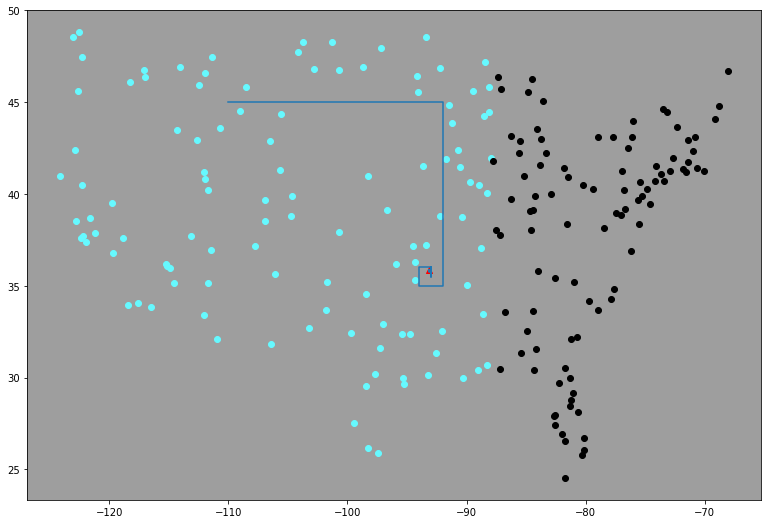

In [36]:
fig=plt.figure()
ax=fig.add_axes([0,0,1.7,1.7])
# ax.set_facecolor('#'+'e2'*3)

ax.set_facecolor('#'+'9e'*3)

for i in range(len(arr)):
    ax.scatter(arr_X[0][i],arr_X[1][i], color=par_f(X.klaster[i]))


# for i in range(len(arr)):
#     ax.scatter(arr_X[0][i],arr_X[1][i], color=par_f(5))


# ax.scatter(poi[0],poi[1], color='#ff0000',marker = '^')
plt.plot(poi[0],poi[1])
ax.scatter(final_point[0],final_point[1], color='#ff0000',marker = '^')


plt.show()

In [37]:
from matplotlib import cm

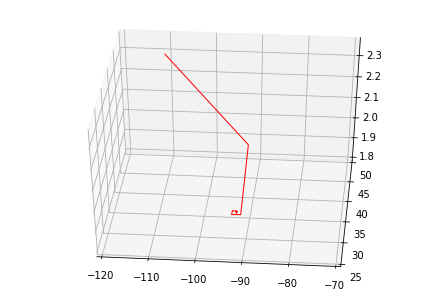

In [38]:
fig = pylab.figure()
axes = Axes3D(fig)
# axes=fig.add_axes([0,0,1.7,1.7])
axes.set_xlim3d(-120, -70)
axes.set_ylim3d(25, 50)

axes.view_init(40,-85)

# axes.plot_surface(x, y, z,cmap='viridis')

# axes.plot_surface(x, y, z,cmap = cm.coolwarm)


axes.plot(poi[0],poi[1],z_cdm, color = "#ff0000", linewidth = 1)

# axes.w_zaxis.set_pane_color((0,0,0,1))

pylab.show()

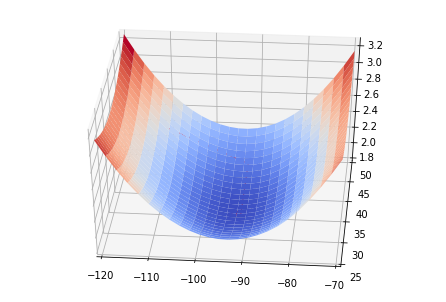

In [39]:
fig = pylab.figure()
axes = Axes3D(fig)
# axes=fig.add_axes([0,0,1.7,1.7])
axes.set_xlim3d(-120, -70)
axes.set_ylim3d(25, 50)

axes.view_init(40,-85)

# axes.plot_surface(x, y, z,cmap='viridis')

axes.plot_surface(x, y, z,cmap = cm.coolwarm)


axes.plot(poi[0],poi[1],z_cdm, color = "#ff0000", linewidth = 1)

# axes.w_zaxis.set_pane_color((0,0,0,1))

pylab.show()